# Tarea 1
En esta tarea partimos de los datos del csv *airbnb.csv*, un listado de información sobre las ofertas existentes de airbnb para la ciudad de Madrid, en abril de 2017.
Realizaremos una serie de ejercicios sobre el conjunto de datos del csv:
* Estudio de los datos y de la variable room_type
* Entrenamiento de los datos
* Validación de los datos

## Ejercicio 1 - Estudio de los datos y de la variable room_type
En este ejercicio cargaremos los datos a partir de la función *load_data* del archivo *load_data.py*. Mostramos los registros del dataset.

In [91]:
## imports 
import matplotlib.pyplot as plt
from load_data import load_data
 
airbnb = load_data()
airbnb

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Centro,Justicia,40.424715,-3.698638,Entire home/apt,49,28,35,0.42,1,99
1,Centro,Embajadores,40.413418,-3.706838,Entire home/apt,80,5,18,0.30,1,188
2,Moncloa - Aravaca,Argüelles,40.424920,-3.713446,Entire home/apt,40,2,21,0.25,9,195
3,Moncloa - Aravaca,Casa de Campo,40.431027,-3.724586,Entire home/apt,55,2,3,0.13,9,334
4,Latina,Cármenes,40.403410,-3.740842,Private room,16,2,23,0.76,2,250
...,...,...,...,...,...,...,...,...,...,...,...
13316,Centro,Justicia,40.427500,-3.698354,Private room,14,1,0,0.00,1,10
13317,Chamberí,Gaztambide,40.431187,-3.711909,Entire home/apt,47,1,0,0.00,7,354
13318,Centro,Palacio,40.413552,-3.711461,Entire home/apt,60,2,0,0.00,1,17
13319,Centro,Universidad,40.425400,-3.709921,Entire home/apt,150,5,0,0.00,1,15


Como podemos observar, la variable *neighbourhood_group* nos indica la zona de madrid en la que se sitúa. *Neighbourhood* es el barrio donde se encuentra el piso. *Latitude* y *longitude* son la latitud y la longitud geográficas del piso. *Room_type* es el tipo de apartamento (si se alquila entero o una habitación). *Price* es el precio, *minimum_nights* es la cantidad mínima de noches que se tiene que alquilar el piso, *number_of_reviews* es la cantidad de reseñas, *reviews_per_month* es la cantidad media de reviews al mes, *calculated_host_listings_count* es y por último *availability_365* es la disponibilidad del piso al año (en días).


In [92]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13321 entries, 0 to 13320
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             13321 non-null  object 
 1   neighbourhood                   13321 non-null  object 
 2   latitude                        13321 non-null  float64
 3   longitude                       13321 non-null  float64
 4   room_type                       13321 non-null  object 
 5   price                           13321 non-null  int64  
 6   minimum_nights                  13321 non-null  int64  
 7   number_of_reviews               13321 non-null  int64  
 8   reviews_per_month               13321 non-null  float64
 9   calculated_host_listings_count  13321 non-null  int64  
 10  availability_365                13321 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 1.1+ MB


In [93]:
airbnb.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,13321.000000,13321.000000,13321.000000,13321.000000,13321.000000,13321.000000,13321.000000,13321.000000
mean,40.420730,-3.697268,69.171834,3.010885,22.986037,1.520329,7.605885,205.867202
std,0.020344,0.023832,103.721126,12.835619,38.406006,1.852367,19.619972,126.968961
min,40.331888,-3.863907,9.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,40.410090,-3.707856,31.000000,1.000000,1.000000,0.110000,1.000000,84.000000
50%,40.418731,-3.701602,53.000000,2.000000,7.000000,0.780000,2.000000,247.000000
75%,40.427997,-3.693818,80.000000,3.000000,28.000000,2.320000,4.000000,321.000000
max,40.562736,-3.526821,7700.000000,1125.000000,446.000000,17.210000,145.000000,365.000000


In [94]:
airbnb['neighbourhood_group'].value_counts()

Centro                   6773
Chamberí                  960
Salamanca                 883
Arganzuela                790
Tetuán                    463
Moncloa - Aravaca         450
Retiro                    439
Latina                    379
Chamartín                 361
Carabanchel               358
Ciudad Lineal             308
Puente de Vallecas        222
Hortaleza                 185
Fuencarral - El Pardo     170
Usera                     145
San Blas - Canillejas     117
Villaverde                 83
Barajas                    81
Moratalaz                  74
Villa de Vallecas          46
Vicálvaro                  34
Name: neighbourhood_group, dtype: int64

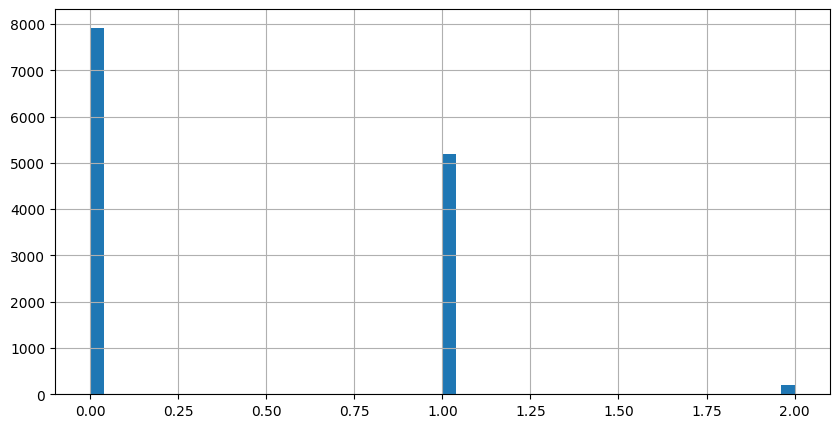

In [95]:
airbnb['room_type'].replace(['Entire home/apt', 'Private room', 'Shared room'], [0, 1, 2], inplace=True)
%matplotlib inline 
airbnb['room_type'].hist(bins=50, figsize=(10,5))
plt.show()

In [96]:
corr_matrix = airbnb.corr()
corr_matrix["room_type"].sort_values(ascending=False)

C:\Users\UO250985\AppData\Local\Temp\ipykernel_15904\2160690179.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = airbnb.corr()


room_type                         1.000000
longitude                         0.063719
availability_365                  0.019544
latitude                         -0.002640
minimum_nights                   -0.031211
calculated_host_listings_count   -0.092232
number_of_reviews                -0.141032
reviews_per_month                -0.143322
price                            -0.228863
Name: room_type, dtype: float64

array([[<AxesSubplot: xlabel='room_type', ylabel='room_type'>,
        <AxesSubplot: xlabel='longitude', ylabel='room_type'>,
        <AxesSubplot: xlabel='availability_365', ylabel='room_type'>,
        <AxesSubplot: xlabel='latitude', ylabel='room_type'>],
       [<AxesSubplot: xlabel='room_type', ylabel='longitude'>,
        <AxesSubplot: xlabel='longitude', ylabel='longitude'>,
        <AxesSubplot: xlabel='availability_365', ylabel='longitude'>,
        <AxesSubplot: xlabel='latitude', ylabel='longitude'>],
       [<AxesSubplot: xlabel='room_type', ylabel='availability_365'>,
        <AxesSubplot: xlabel='longitude', ylabel='availability_365'>,
        <AxesSubplot: xlabel='availability_365', ylabel='availability_365'>,
        <AxesSubplot: xlabel='latitude', ylabel='availability_365'>],
       [<AxesSubplot: xlabel='room_type', ylabel='latitude'>,
        <AxesSubplot: xlabel='longitude', ylabel='latitude'>,
        <AxesSubplot: xlabel='availability_365', ylabel='latitude'>,
  

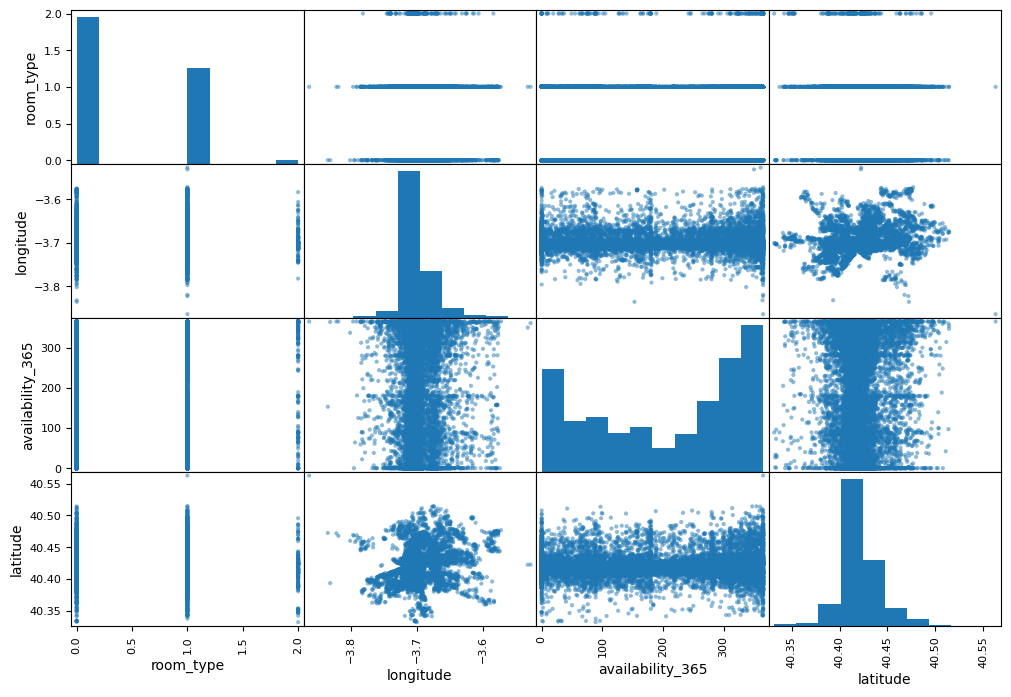

In [97]:
from pandas.plotting import scatter_matrix
attributes = ["room_type", "longitude", "availability_365",
"latitude"]
scatter_matrix(airbnb[attributes], figsize=(12, 8))

<AxesSubplot: xlabel='room_type', ylabel='longitude'>

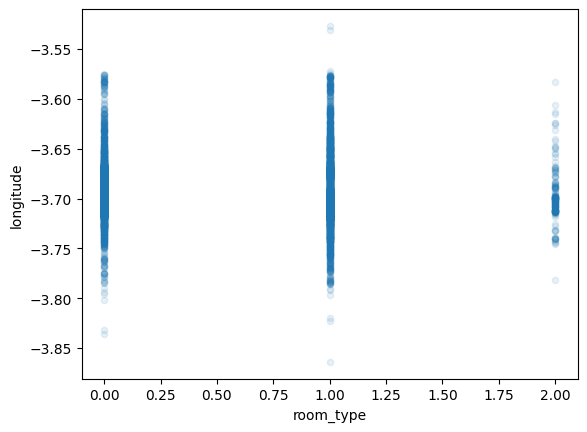

In [98]:
airbnb.plot(kind="scatter", x="room_type", y="longitude",
alpha=0.1)

<AxesSubplot: xlabel='room_type', ylabel='availability_365'>

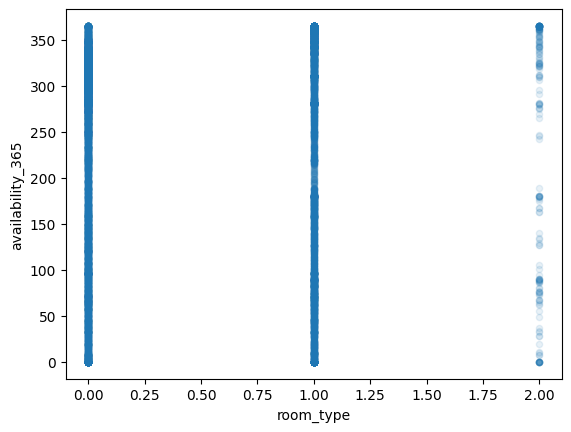

In [99]:
airbnb.plot(kind="scatter", x="room_type", y="availability_365",
alpha=0.1)

<AxesSubplot: xlabel='room_type', ylabel='latitude'>

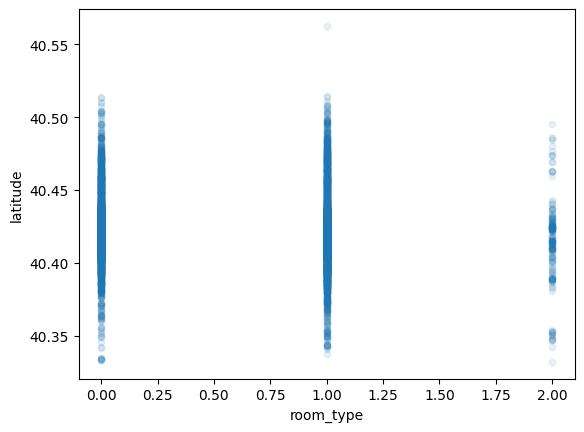

In [100]:
airbnb.plot(kind="scatter", x="room_type", y="latitude",
alpha=0.1)

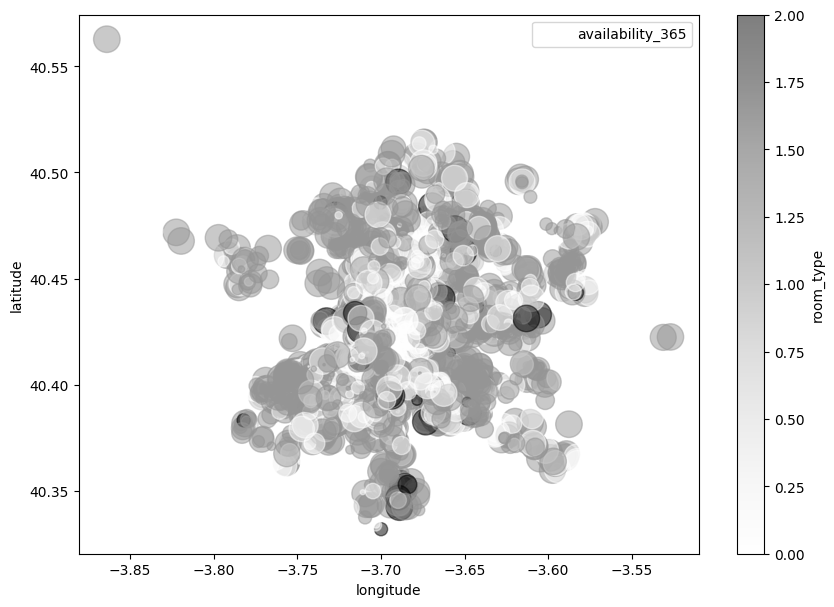

In [101]:
airbnb.plot(kind="scatter", x="longitude", y="latitude", alpha=0.5,
s=airbnb["availability_365"], label="availability_365", figsize=(10,7),
c="room_type", colorbar=True,
)
plt.legend()

## Separación de sets

In [102]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(airbnb, airbnb["room_type"]):
    strat_train_set = airbnb.loc[train_index]
    strat_test_set = airbnb.loc[test_index]

In [103]:
# from sklearn.model_selection import train_test_split
# train_set, test_set = train_test_split(airbnb, test_size=0.2, random_state=42)
airbnb_labels = strat_train_set['room_type'].copy()
airbnb_num = strat_train_set.drop('room_type', axis=1)

In [104]:
airbnb_cat = airbnb_num[["neighbourhood"]]
airbnb_cat.head(10)

,neighbourhood
6592,Universidad
12693,Timón
3995,Imperial
6860,Embajadores
11992,Universidad
2891,Justicia
11297,Palos de Moguer
7739,Delicias
360,Almenara
2371,Universidad


In [105]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
airbnb_cat_encoded = ordinal_encoder.fit_transform(airbnb_num[["neighbourhood"]])
airbnb_num['neighbourhood'] = airbnb_cat_encoded
airbnb_cat_encoded2 = ordinal_encoder.fit_transform(airbnb_num[['neighbourhood_group']])
airbnb_num['neighbourhood_group'] = airbnb_cat_encoded2
airbnb_num

,neighbourhood_group,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
6592,3.0,115.0,40.427645,-3.703442,65,4,14,1.25,2,71
12693,1.0,113.0,40.473495,-3.597737,30,1,0,0.00,1,74
3995,0.0,61.0,40.408305,-3.721489,49,3,2,0.09,1,0
6860,3.0,49.0,40.409374,-3.702089,130,2,23,2.05,1,321
11992,3.0,115.0,40.424803,-3.702503,89,2,2,2.00,2,2
...,...,...,...,...,...,...,...,...,...,...
10881,3.0,115.0,40.423669,-3.708941,68,1,0,0.00,1,344
1796,3.0,112.0,40.415168,-3.707672,20,1,23,0.69,12,337
12191,3.0,115.0,40.428965,-3.703498,22,1,11,7.67,1,133
7438,10.0,16.0,40.433183,-3.720444,46,2,18,1.67,1,0


In [106]:
airbnb_labels

6592     0
12693    1
3995     0
6860     0
11992    0
        ..
10881    0
1796     2
12191    1
7438     0
887      1
Name: room_type, Length: 10656, dtype: int64

In [107]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer()),
    ('std_scaler', StandardScaler()),
    ])
airbnb_num_tr = num_pipeline.fit_transform(airbnb_num)
airbnb_num_tr.shape

(10656, 10)

In [108]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

num_attribs = list(airbnb_num)
cat_attribs = ["neighbourhood", "neighbourhood_group"]
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])
airbnb_prepared = full_pipeline.fit_transform(airbnb_num)
airbnb_prepared.shape

(10656, 157)

In [109]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(airbnb_prepared, airbnb_labels)

LinearRegression()

In [110]:
some_data = airbnb_num.iloc[:5]
some_labels = airbnb_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [0.31847154 0.84477162 0.52868368 0.31845028 0.26390497]
Labels: [0, 1, 0, 0, 0]


In [111]:
from sklearn.metrics import mean_squared_error
predictions = lin_reg.predict(airbnb_prepared)
lin_mse = mean_squared_error(airbnb_labels, predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.477209533577435

In [112]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(airbnb_prepared, airbnb_labels)
predictions = tree_reg.predict(airbnb_prepared)
tree_mse = mean_squared_error(airbnb_labels, predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [113]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, airbnb_prepared, airbnb_labels,
scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [114]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [0.39698677 0.38499044 0.38862822 0.38377018 0.41883426 0.40517293
 0.38881063 0.36771085 0.37902767 0.39717311]
Mean: 0.3911105060045289
Standard deviation: 0.013542414564851663


In [115]:
lin_scores = cross_val_score(lin_reg, airbnb_prepared, airbnb_labels, scoring="neg_mean_squared_error", cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [0.47059295 0.47698789 0.48247347 0.46643059 0.74196439 0.48806179
 0.48992905 0.47095517 0.47832783 0.48590287]
Mean: 0.505162599861247
Standard deviation: 0.07928721030609712


In [116]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(airbnb_prepared, airbnb_labels)
airbnb_predictions = forest_reg.predict(airbnb_prepared)
forest_mse = mean_squared_error(airbnb_labels, airbnb_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.10480113084803534

In [118]:
forest_scores = cross_val_score(forest_reg, airbnb_prepared, airbnb_labels,
scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [0.28746009 0.27466883 0.27403096 0.28607275 0.29788277 0.283649
 0.28278527 0.27794045 0.26972234 0.28831516]
Mean: 0.28225276150013057
Standard deviation: 0.007910203866717251


In [119]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(airbnb_prepared, airbnb_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [120]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [122]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.3769914130933053 {'max_features': 2, 'n_estimators': 3}
0.3311402339158221 {'max_features': 2, 'n_estimators': 10}
0.3152813392938504 {'max_features': 2, 'n_estimators': 30}
0.3858202181914667 {'max_features': 4, 'n_estimators': 3}
0.3253902749509458 {'max_features': 4, 'n_estimators': 10}
0.3147664212564126 {'max_features': 4, 'n_estimators': 30}
0.36956059801554386 {'max_features': 6, 'n_estimators': 3}
0.32001183357374285 {'max_features': 6, 'n_estimators': 10}
0.3066421181546614 {'max_features': 6, 'n_estimators': 30}
0.36036115779787636 {'max_features': 8, 'n_estimators': 3}
0.31776154403653956 {'max_features': 8, 'n_estimators': 10}
0.30035700783049374 {'max_features': 8, 'n_estimators': 30}
0.37217371327441984 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.3300047719691592 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.3811161104899471 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.32834401823048315 {'bootstrap': False, 'max_features'

## Naive bayes

In [15]:
airbnb["room_type"]

0        0
1        0
2        0
3        0
4        1
        ..
13316    1
13317    0
13318    0
13319    0
13320    0
Name: room_type, Length: 13321, dtype: int64

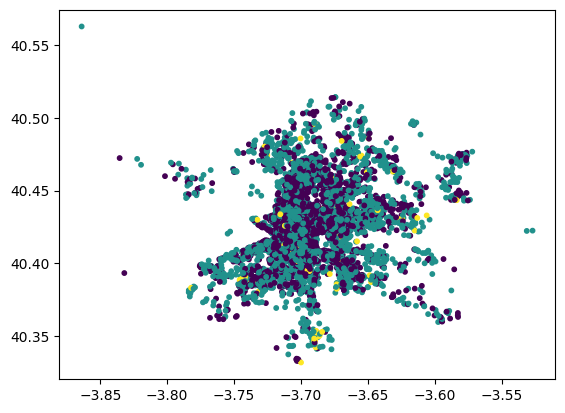

In [16]:
import numpy as np
X = airbnb.iloc[:, 3:1:-1]
X = X.values
y = np.array(airbnb["room_type"]).T
# X = X[:1300]
# y = y[:1300]
# len(X)
plt.scatter(X[:, 0], X[:, 1], c=y, s=10);

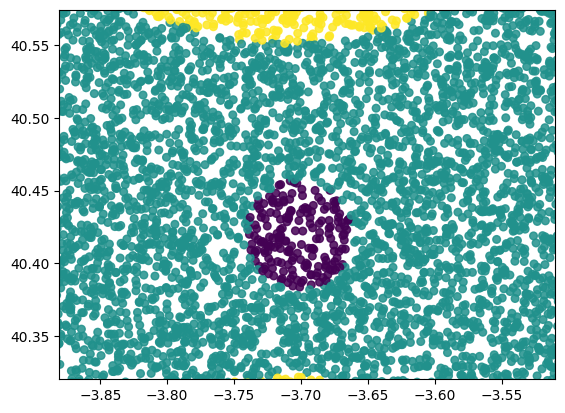

In [17]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y);

rng = np.random.RandomState(0)
Xnew = [-3.9, 40.3] + [0.4, 0.3] * rng.rand(5000, 2)
ynew = model.predict(Xnew)
# Xnew
plt.scatter(X[:, 0], X[:, 1], c=y, s=10, alpha=0);
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=30, alpha=0.85)
plt.axis(lim);

## KNN

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(array([0, 1], dtype=int64), array([10054,  3267], dtype=int64))


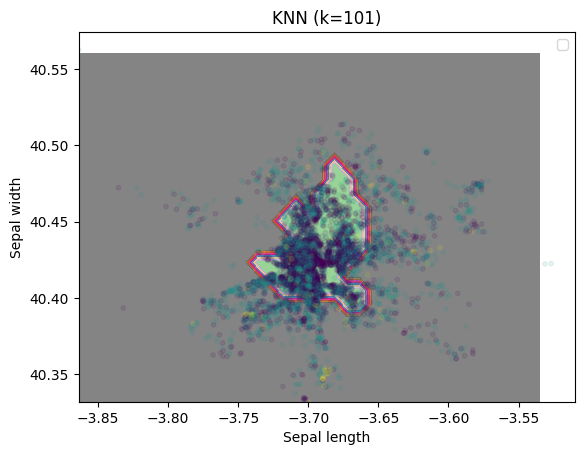

In [18]:
from sklearn.neighbors import KNeighborsClassifier
k = 101
#---instantiate learning model---
knn = KNeighborsClassifier(n_neighbors=k)
#---fitting the model---
knn.fit(X, y)
#---min and max for the first feature---
x_min, x_max = X[:, 0].min(), X[:, 0].max() 
#---min and max for the second feature---
y_min, y_max = X[:, 1].min(), X[:, 1].max() 
#---step size in the mesh---
h = (x_max / x_min)/100
#---make predictions for each of the points in xx,yy---
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
#---draw the result using a color plot---
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Accent, alpha=0.8)
#---plot the training points---
# colors = ['red', 'green', 'blue']
# for color, i, target in zip(colors, [0, 1, 2], iris.target_names):
#     plt.scatter(X[y==i, 0], X[y==i, 1], color=color, label=target)
plt.scatter(X[:, 0], X[:, 1], c=y, s=10, alpha=0.1);
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title(f'KNN (k={k})')
plt.legend(loc='best', shadow=False, scatterpoints=1)
predictions = knn.predict(X)
#--classifications based on predictions---
print(np.unique(predictions, return_counts=True))

In [19]:
from sklearn.model_selection import cross_val_score
#---holds the cv (cross-validates) scores---
cv_scores = []
#---use all features---
# X = iris.data[:, :4]
# y = iris.target
#---number of folds---
folds = 10
#---creating odd list of K for KNN---
ks = list(range(1,int(len(X)/100 * ((folds - 1)/folds))))
#---remove all multiples of 3---
ks = [k for k in ks if k % 3 != 0]
#---perform k-fold cross validation---
for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    #---performs cross-validation and returns the average accuracy---
    scores = cross_val_score(knn, X, y.T, cv=folds, scoring='accuracy')
    mean = scores.mean()
    cv_scores.append(mean)
    print(k, mean)

1 0.5735308827206802
2 0.6079125637265171
4 0.6187226986926911
5 0.6132427814160747
7 0.6187221918092136
8 0.6329113246780163
10 0.6398178373422184
11 0.6356887645334757
13 0.6395934569227892
14 0.6440970603011114
16 0.6447728486175598
17 0.6419950145193957
19 0.6424448454455955
20 0.6469492373093273
22 0.6495015645803343
23 0.647925720168781
25 0.6486009452813655
26 0.6504022401996896
28 0.6495015082599479
29 0.6495766396554095
31 0.6484506824904426
32 0.6488257199434995
34 0.6505520524275212
35 0.6493508512263201
37 0.6490503819648606
38 0.6506269585414372
40 0.650176677052146
41 0.6500265269019958
43 0.6506269585414372
44 0.6513772587290967
46 0.6511527093485083
47 0.6498011890359978
49 0.6510025028779717
50 0.6514529533284222
52 0.6528039104370686
53 0.6508519021647304
55 0.651828103422252
56 0.6524285913820798
58 0.6512273901808786
59 0.6507017520145802
61 0.651377709292188
62 0.6519031221769407
64 0.6522782722707704
65 0.6528041357186144
67 0.6538546235658014
68 0.653554548547046

The optimal number of neighbors is 101


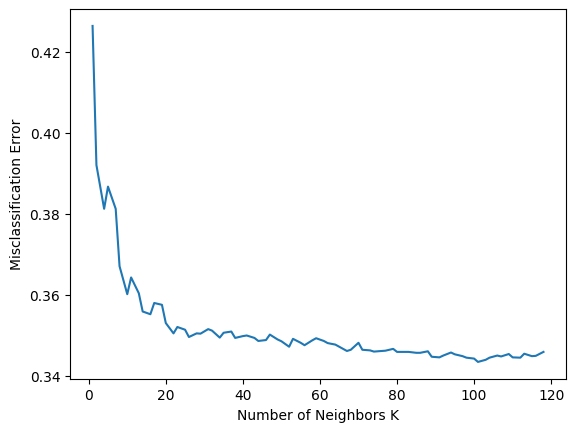

In [20]:
#---calculate misclassification error for each k---
MSE = [1 - x for x in cv_scores]
#---determining best k (min. MSE)---
optimal_k = ks[MSE.index(min(MSE))]
print(f"The optimal number of neighbors is {optimal_k}")
#---plot misclassification error vs k---
plt.plot(ks, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()